**Fachprojekt Computervision** *WS 2022/23* -- *Dominik Koßmann, Gernot A. Fink* -- *TU Dortmund, LS12, Mustererkennung in eingebetteten Systemen*
___

# Aufgabe 1: Lokale Bilddeskriptoren

Herzlich Willkommen zum Fachprojekt Computer Vision!

Im Rahmen des Fachprojekts sollen Sie eine typische Erkennungspipeline zur Klassifikation von Bilddaten kennenlernen und zu großen Teilen selbst implementieren. Während des Entwicklungsprozesses lassen sich zwei unterschiedliche, methodische Herangehensweisen unterscheiden, welche sich auch in der Literatur widerspiegeln. Lange Zeit beruhten Erkennungssysteme auf der Verwendung heuristischer Bilddeskriptoren in Kombination mit verschiedenen Klassifikatoren. Diese Trennung von Merkmalsextraktion und Klassifikation wurde schrittweise von Modellen abgelöst, welche beide Probleme kombiniert lösen. Hierfür eignen sich neuronale Netze, insbesondere Architekturen die auf Faltungsschichten beruhen, welche Merkmalsextraktion und Klassifikation auf Basis einer großen Anzahl an Beispieldaten lernen können. Während sich die methodischen Ansätze stark unterscheiden, ähneln die gelernten Bausteine modernder Methodik tradionellen Ansätzen, die meist auf von Experten designten Verfahren beruhen.

In den ersten Aufgaben sollen Sie zunächst ein klassisches Erkennungssystem basierend auf dem Bag-of-Features Konzept aufbauen. Grundlage für diesen Ansatz sind lokale Bilddeskriptoren (Features), welche Bildbereiche durch eine kompakte, numerische Repräsentation darstellen. Es hat sich gezeigt, dass Deskriptoren, welche auf Gradientenstatistiken beruhen, besonders zur Klassifikation geeignet sind. Ein typisches Beispiel hierfür ist der Deskriptor, welcher in der Scale Invariant Feature Transform (SIFT) Anwendung findet. Dieser soll im Folgenden schrittweise implementiert werden.

## Bildgradienten
Bei dem Bildgradienten handelt es sich um die (zweidimensionale) Ableitung der Bildintensität nach x und y. Ein zweidimensionales Graustufenbild kann dazu als diskretes Signal aufgefasst werden. In der Praxis wird der entsprechende Gradient durch spezielle Operatoren approximiert. Insbesondere die pixelweise Darstellung des Gradienten in Polarkoordinaten (Orientierung und Magnitude) wird bei der Berechnung lokaler Deskriptoren ausgenutzt.

Nutzen Sie zunächst OpenCV, um das Beispielbild `Camera_obscura.jpg` zu laden. Mit Hilfe der Funktion `cvtColor` lässt sich das Bild in unterschiedliche Farbräume überführen. Visualiseren Sie das Graustufenbild.

**Hinweis:** Beachten Sie, dass OpenCV ein TopLeft-Koordinatensystem verwendet. Das Pixel (0, 0) ist folglich das obere linke Pixel des Bildes. Zudem werden Bilder mit [y (Höhe), x (Breite)] adressiert.


<class 'numpy.ndarray'>
(580, 363, 3)
(580, 363)


(-0.5, 362.5, 579.5, -0.5)

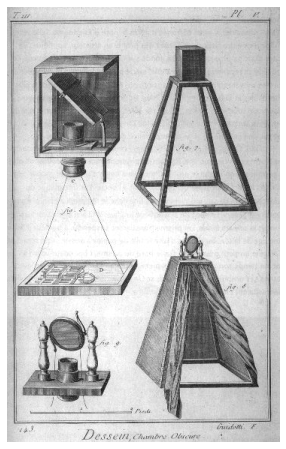

In [1]:
# Die folgenden magic commands werden benoetigt um Module ohne erneuten Import neu zu laden
%load_ext autoreload
%autoreload 2

# Verwednung von matplotlib inline oder widget
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#img = ...
img = cv.imread('Camera_obscura.jpg')
print(type(img))
print(img.shape)
img=cv.cvtColor(img, cv.COLOR_BGR2GRAY);
print(img.shape)


#raise NotImplementedError()

fig, ax = plt.subplots(figsize=(5,8))
ax.imshow(img, cmap='gray')
plt.axis('off')

Um den Bildgradienten an jedem Pixel zu bestimmen kann der Sobel-Operator verwendet werden. Dieser lässt sich als 3x3 Filtermaske definieren, wobei eine vertikale und horizontale Maske benötigt wird:

$ S_x = \begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$  &emsp;&emsp;  **und** &emsp;&emsp; $ S_y = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

Die Berechnung des Bildgradienten in x- und y-Richtung erfolgt durch die Faltung der Filtermaske mit dem Bild. Bei der Faltungsopration wird an jeder Pixelposition die entsprechende Nachbarschaft betrachtet und die mit den Filterwerten gewichtete Summe berechnet. Ein Eingabebild wird im Folgenden als Funktion $I(x,y)$ repräsentiert, welche für jede Pixelkoordinate (x,y) den entsprechenden Grauwert zurück gibt. Somit ergibt sich die folgende Formulierung der Faltung mit einer Filtermaske $S$ der Dimension 3x3:

$ \large I_{out}(x, y) = \sum_{i=0}^2 \sum_{j=0}^2 I(x-i+1, y-j+1) \cdot S(i,j)$

Der Wert des Gradientenbildes $I_{sobel_x}$ an Position $(x,y)$ wird also wie folgt berechnet (analog für $I_{sobel_y}$ mit $S_y$):

$ \large I_{sobel_x}(x, y) = \sum_{i=0}^2 \sum_{j=0}^2 I(x-i+1, y-j+1) \cdot S_x(i,j)$

Implementieren Sie nun die Faltung des Beispielbilds mit dem vertikalen und horizontalen Sobelmasken $S_x$ und $S_y$. Iterieren Sie dafür zunächst über alle Pixel des Bildes. Extrahieren Sie die entsprechende lokale Nachbarschaft und berechnen Sie die gewichtete Summe.

**Tipp:** Nutzen Sie zur Berechnung der gewichteten Summe zwischen Nachbarschaft und Filtermaske die Funktionalitäten von `Numpy`. Berechnen Sie die Multiplikation von Filtergewichten und Nachbarschaft vektoriell durch geeignetes `Numpy` Indexing. Ignorieren Sie an dieser Stelle die Behandlung von Randfällen. Dies führt zu einem verkleinerten Ausgabebild.


[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  28.  -2. ...  12.  17.   0.]
 [  0.  30.  11. ...  32.   9.   0.]
 ...
 [  0. -15.   6. ...  23.   1.   0.]
 [  0. -26.   6. ...   3.  12.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


(-0.5, 362.5, 579.5, -0.5)

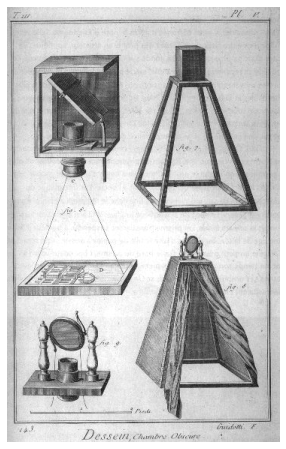

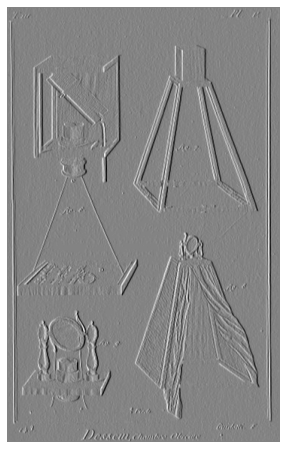

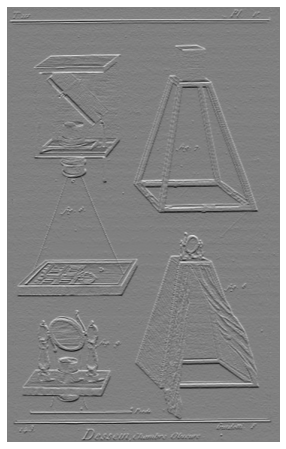

In [2]:
import numpy as np
# Definieren Sie die beiden Sobeloperatoren

sobel_horizontal = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

sobel_vertical = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])


# Berechnen Sie die Faltung des Beispielbildes mit den Filtermasken


# Bilder zum speichern der Ergebnisse der Faltungen
sobel_img_x = np.zeros(img.shape)
sobel_img_y = np.zeros(img.shape)

for x in range(1,img.shape[0]-1):
    for y in range(1,img.shape[1]-1):
        tmp=img[x-1:x+2,y-1:y+2]
        sobel_img_x[x,y]=np.sum(tmp*sobel_horizontal)
        sobel_img_y[x,y]=np.sum(tmp*sobel_vertical)
        
print(sobel_img_x)

        
fig, ax = plt.subplots(figsize=(5,8))
ax.imshow(img, cmap='gray')
plt.axis('off')        
fig, ax = plt.subplots(figsize=(5,8))
ax.imshow(sobel_img_x, cmap='gray')
plt.axis('off')
fig, ax = plt.subplots(figsize=(5,8))
ax.imshow(sobel_img_y, cmap='gray')
plt.axis('off')

#raise NotImplementedError()

Um einen Eindruck über die Funktionsweise der Filteroperation zu gewinnen, sollen nun die Ergebnisse der Faltung wieder als Graustufenbild visualisiert werden. Normalisieren dazu die zuvor berechneten Arrays (`sobel_img_vertical`, `sobel_img_horizontal`) auf den Wertebereich $[0,1]$.

Welche Bildstrukturen werden von den Filtern hervorgehoben? Erklären Sie Ihre Beobachtung.

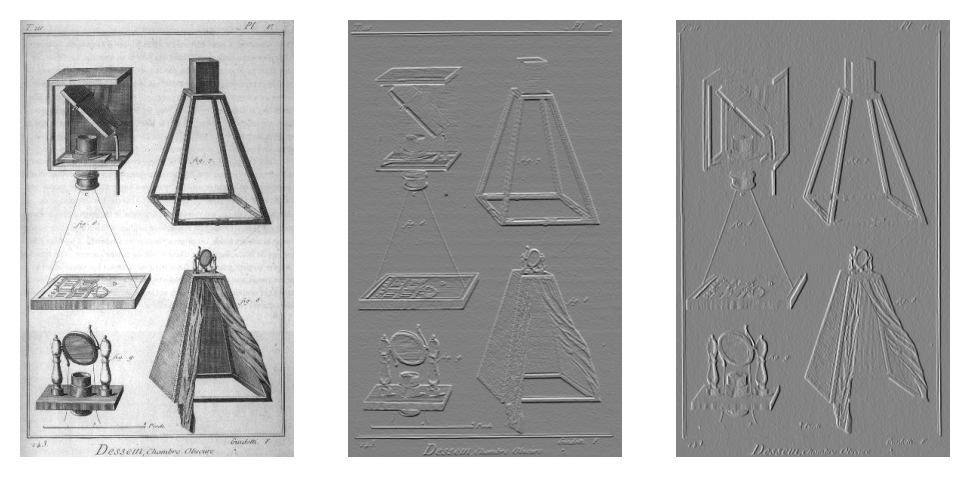

In [3]:
sobel_img_y_norm = np.zeros(img.shape)
sobel_img_x_norm = np.zeros(img.shape)

#sobel_img_y_norm=(sobel_img_y - np.mean(sobel_img_y))/np.std(sobel_img_y)
sobel_img_y_norm=(sobel_img_y-np.min(sobel_img_y))/(np.max(sobel_img_y)-np.min(sobel_img_y))
#sobel_img_x_norm =(sobel_img_x - np.mean(sobel_img_x))/np.std(sobel_img_x)
sobel_img_x_norm=(sobel_img_x-np.min(sobel_img_x))/(np.max(sobel_img_x)-np.min(sobel_img_x))


#raise NotImplementedError()

plt.figure(dpi=200)
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(sobel_img_y_norm, cmap='gray')
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(sobel_img_x_norm, cmap='gray')

Aktuell wird der Bildgradient $G$ and jeder Pixelposition über eine x- und y-Komponente repräsentiert. Für die spätere Berechnung der Bildeskriptoren ist es hilfreich den Gradienten in Polarkoordinaten zu überführen. Berechnen Sie dazu für jeden Pixel eine entsprechende Orientierung und Magnitude, wie folgt:

$ \mathbf{G} = \begin{pmatrix} G_x \\ G_y \end{pmatrix}$ &emsp; mit &emsp; $G_x = I * S_x$, &nbsp; $G_y = I * S_y$

$ G_{mag} = \sqrt{G^2_x + G^2_y} $ &emsp; $ G_{dir} = \text{arctan}\frac{G_y}{G_x} $

**Tipp:** Nutzen sie zur Berechenung des Arkustangens die Funktion `np.arctan2`. Verwenden Sie die unnormierten Gradienten `sobel_img_x` und `sobel_img_y`.


(-0.5, 362.5, 579.5, -0.5)

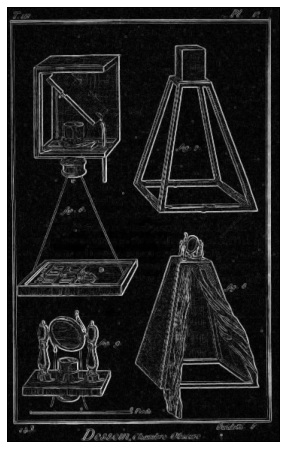

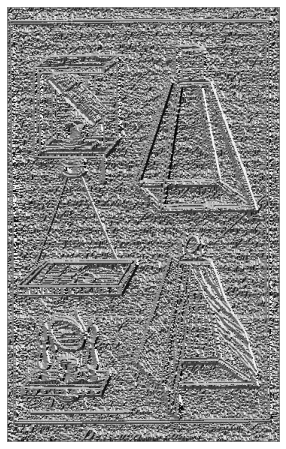

In [4]:
#raise NotImplementedError()

gradient_magnitudes =np.sqrt(sobel_img_x**2 + sobel_img_y**2)
gradient_directions =np.arctan2(sobel_img_y,sobel_img_x)
fig, ax = plt.subplots(figsize=(5,8))
ax.imshow(gradient_magnitudes, cmap='gray')
plt.axis('off')        
fig, ax = plt.subplots(figsize=(5,8))
ax.imshow(gradient_directions, cmap='gray')
plt.axis('off')


Auch diese Repräsentation soll im Folgenden zur besseren Interpretierbarkeit visualisiert werden. Stellen Sie zunächst die Magnituden der Gradienten als Graustufenbild dar. Beachten Sie die erneut notwendige Normalisierung.

Anschließend soll die Raumrichtung des Gradienten farblich kodiert werden. Da im RGB Farbraum die wahrgenommene Farbe aus der Kombination der drei Werte resultiert, eignet sich dieser schlecht, um numerische Werte auf Farben abzubilden. Anders ist das beim HSV Farbraum. Dieser beschreibt einen Pixel über den Farbwert (Hue), die Sättigung (Saturation) und die Dunkelstufe (Value). Somit herrscht ein direkter Zusammenhang zwischen dem numerischen Wert im ersten Kanal und der wahrgenommenen Farbe. Nutzen Sie den Farbraum, indem Sie die berechneten Raumrichtungen in den Farbkanal eines HSV-Bildes schreiben.

Abschließend sollen die Raumrichtungen mit den Magnituden gewichtet werden. Dazu wird erneut auf den HSV Farbraum zurückgegriffen. Nutzen Sie den Value Kanal des HSV Bildes um die Magnituden zu repräsentieren.

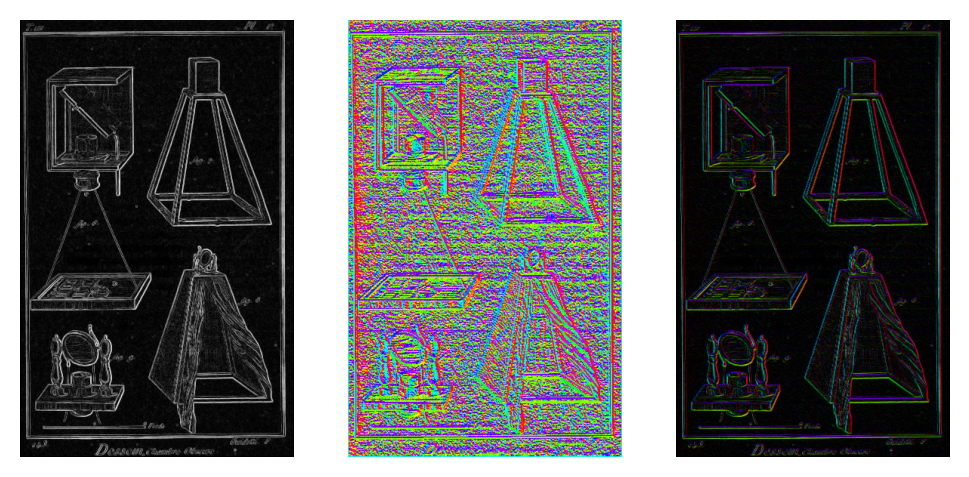

In [5]:
import matplotlib

# Normalisieren sie die Gradientanmagnituden auf den Wertebereich [0,1]
gradient_magnitudes_norm = (gradient_magnitudes-np.min(gradient_magnitudes))/(np.max(gradient_magnitudes)-np.min(gradient_magnitudes))

#raise NotImplementedError()

# Berechnen Sie ein HSV Bild für die Gradientenrichtung
#   1. Normalisieren Sie die Gradientenorientierung auf [0,1]
#   2. Erstellen Sie ein HSV Bild entsprechend der originalen Bildgröße
#   3. Schreiben Sie die Orientierungen in des Farbkanal des zuvor erstellten Bildes
#
gradient_directions_norm=(gradient_directions-np.min(gradient_directions))/(np.max(gradient_directions)-np.min(gradient_directions))


gradient_directions_hsv = np.ones((580, 363, 3))

gradient_directions_hsv[:,:,0]=gradient_directions_norm




#raise NotImplementedError()

# Berechnen Sie ein HSV Bild für die Kombination Gradientenrichtung und Magnitude
# Gehen Sie wie zuvor vor. Schreiben Sie die Magnituden in den Value Kanal des HSV Bildes
#
gradient_directions_magnitudes_hsv = np.ones((580, 363, 3))
gradient_directions_magnitudes_hsv[:,:,0]=gradient_directions_norm
gradient_directions_magnitudes_hsv[:,:,2]=gradient_magnitudes_norm



#raise NotImplementedError()


gradient_directions_rgb = matplotlib.colors.hsv_to_rgb(gradient_directions_hsv)





gradient_directions_magnitudes_rgb = matplotlib.colors.hsv_to_rgb(gradient_directions_magnitudes_hsv)

plt.figure(dpi=200)
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(gradient_magnitudes, cmap='gray')
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(gradient_directions_rgb)

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(gradient_directions_magnitudes_rgb)





Typische Bilddeskriptoren beruhen darauf, die Verteilung der in einem Bereich vorkommenden Gradienten zu erfassen. Hierzu werden häufig Histogramme genutzt, welche über quantisierte Raumrichtungen gebildet werden. Das bedeutet, dass während zuvor die Gradientenrichtung kontinuierlich dargestellt wurde, soll sie nun auf eine von acht Hauptrichtungen abgebildet werden. Quantisieren Sie dazu das zuvor berechnete Array (`gradient_directions`) dessen Werte im Bereich [0,1] liegen. Das resultierende Array sollte anschließend nur Integers im Wertebereich [0,7] enthalten.

In [6]:
quantized_gradient_directions= np.round(gradient_directions_norm*7)

#raise NotImplementedError()

Nun soll für einen Bildausschnitt auf Basis der zuvor berechneten Gradienten ein Deskriptor berechnet werden. Im Allgemeinen wird der Ausschnitt zunächst in kleinere Zellen unterteilt. Jede Zelle enthält pixelweise Gradienteninformationen, welche durch das Bilden eines Histogramms über die Zelle als Vektor zusammengefasst werden kann. Hierbei werden die quatisieren Raumrichtungen als "Bins" verwendet. Der finale Deskriptor besteht aus der Konkatenation der Zellenhistogramme. Der wohl bekannteste Deskriptor welcher auf diesem Prinizp beruht, stammt aus der SIFT Methodik. Dieser unterteilt den Bildausschnit in 4x4 Zellen, wobei 8 Raumrichtungen die Grundlage der Histogramme bilden. Welche Dimension hat bei dieser Konfiguration der finale Deskriptor?

Die Struktur des Deskriptors wird über die Variablen `desc_size`, welche die Größe des Analysefensters angibt, und `cells`, welche die Anzahl der Zellen (horizontal und vertikal) angibt, festgelegt.
Die Größe der Zellen (`cell_size`) ergibt sich dementsprechend aus `desc_size / cells`. $(patch\_x,patch\_y)$ definiert den Mittelpunkt des Analysefensters. Folgende Codezelle visualisiert den gewählten Bildausschnitt.


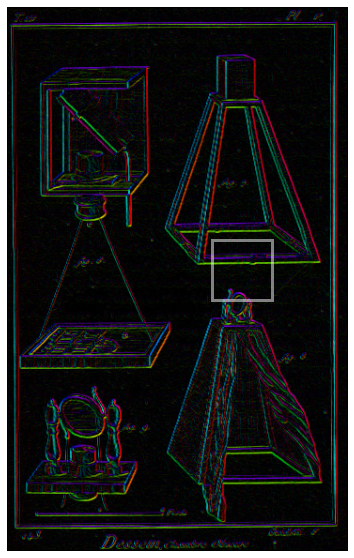

In [7]:
from matplotlib.patches import Rectangle

desc_size = 64
cells = 4
cell_size = int(desc_size / cells)

patch_x, patch_y = (250, 280)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,1,1)
plt.axis('off')

ax1.imshow(gradient_directions_magnitudes_rgb)

rect = Rectangle((patch_x - desc_size / 2, patch_y - desc_size / 2), desc_size, desc_size, alpha=.5, lw=3, fill=None, color='w')
ax1.add_patch(rect)

Implementieren Sie nun schrittweise die Berechnung eines solchen lokalen Bilddeskriptors. Extrahieren Sie zunächst die zum Bildauschnitt korrespondierenden RGB-Werte (`gradient_directions_magnitudes_rgb`), Magnituden (`gradient_magnitudes`) und quantisierte Orientierungen (`quantized_gradient_directions`). Die entsprechende Einteilung in Zellen wird im Folgenden dargestellt.


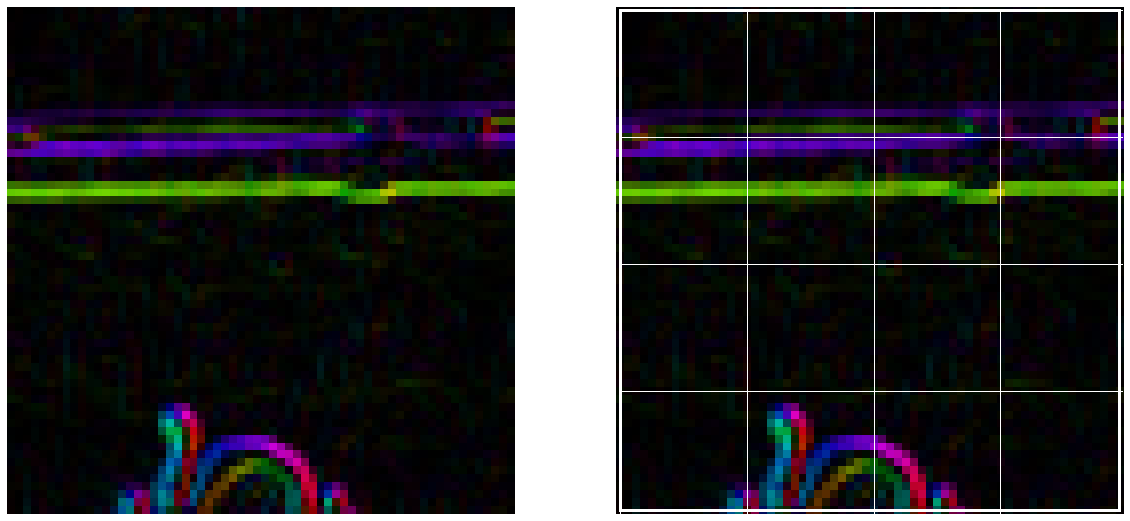

In [8]:
from common.visualization import plot_cells, plot_arrow

patch_rgb = np.zeros((desc_size, desc_size, 3))
#print(gradient_directions_magnitudes_rgb.shape)
patch_rgb = gradient_directions_magnitudes_rgb[patch_x:patch_x+64,patch_y-64:patch_y,:] 
patch_orientations =matplotlib.colors.rgb_to_hsv(patch_rgb)[:,:,0]
patch_magnitudes =matplotlib.colors.rgb_to_hsv(patch_rgb)[:,:,2]

#raise NotImplementedError()

# Plotten des gewählten Patches
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
plt.axis('off')
ax1.imshow(patch_rgb)

# Unterteilung des Patches in Zellen
ax2 = plt.subplot(1,2,2)
plt.axis('off')
plot_cells(patch_rgb, ax2, cells, desc_size)

Berechnen Sie nun die Gradientenstatistik für jede Zelle. Extrahieren sie dazu zunächst für alle Pixel der Zelle die Magnituden mit den korrespondierenden quantisierten Raumrichtungen. Summieren Sie anschließend alle Magnituden, welche derselben Raumrichtung angehören.

In [14]:
orientation_histograms = np.zeros((cells, cells, 8))

#here we don t  need patch orientation norm 

#patch_orientations_norm=(patch_orientations-np.min(patch_orientations))/(np.max(patch_orientations)-np.min(patch_orientations))

#patch_orientations_norm=np.round(patch_orientations_norm*7)
#patch_magnitudes_norm=(patch_magnitudes-np.min(patch_magnitudes))/(np.max(patch_magnitudes)-np.min(patch_magnitudes))

for  i in range (cells)  : 
    #create a matrix of size 4 lines and 8 colonnes 
    
    matrix = np.zeros((orientation_histograms.shape[1] , orientation_histograms.shape[2]))
    
    # has 4 lines every line has vector of size 8    
    for  j in range (cells)  : 
        
        cell_orientation = patch_orientations[ i*cell_size :(i*cell_size)+cell_size  , j*cell_size : (j*cell_size)+cell_size ].astype(int)#take a  cell of size 16*16

        cell_magnitude  = patch_magnitudes [i*cell_size :(i*cell_size)+cell_size  , j*cell_size : (j*cell_size)+cell_size]  # take a cell of size 16
        
        #looop over each cell 
       
          
        
         
          
        for x  in range (cell_size)  : # 16
            
              for y  in  range (cell_size)  : #16
                  
                 if  cell_orientation[x,y] in  range(orientation_histograms.shape[2]) : 
                     #valid orientation 
                    matrix[j ,cell_orientation[x,y]] = matrix[j ,cell_orientation[x,y]] + cell_magnitude[x,y]

    orientation_histograms[ i  ,  :  ,  :]  =matrix 
          
           
        

#raise NotImplementedError()
orientation_histograms-=np.min(orientation_histograms)
orientation_histograms/=np.max(orientation_histograms)
print(orientation_histograms)
# Normalisieren sie die gesamten Histogramme auf den Wertebereich [0,1]


[[[0.01694777 0.07009693 0.02992366 0.06410944 0.03853623 0.05032238
   0.02312932 0.0087283 ]
  [0.01845298 0.04087749 0.04451185 0.0457946  0.09364967 0.02025254
   0.02164446 0.01458697]
  [0.01477054 0.05439594 0.04681456 0.05831827 0.02969282 0.01802318
   0.02744029 0.0146246 ]
  [0.01172814 0.03378609 0.05567399 0.06709733 0.04741405 0.01999611
   0.02396417 0.01798392]]

 [[0.02124023 0.03191998 0.04617182 0.06062426 0.05806285 0.04133452
   0.05255081 0.038195  ]
  [0.02038768 0.0448737  0.02741162 0.07073093 0.04724955 0.04387396
   0.05396501 0.00617485]
  [0.01231332 0.02002018 0.02687762 0.06901354 0.05344712 0.03730831
   0.0355699  0.02187323]
  [0.0028883  0.0243207  0.03367736 0.04070815 0.03242742 0.03357749
   0.03052626 0.00533059]]

 [[0.         0.06889042 0.80959829 0.02753867 0.03721779 0.8418272
   0.04070918 0.00746858]
  [0.03005817 0.06181994 0.87885249 0.02919391 0.17385414 0.9900592
   0.12858209 0.03649604]
  [0.07269471 0.0805333  0.73261604 0.03071685 0

Die berechnet Gradientenstatistiken sollen nun für jede Zelle visualisiert werden. Dafür eignet sich die Darstellung der Histogrammeinträge als Vektoren. Gehen Sie für jede Zelle wie folgt vor:
* Pro Raumrichtung (Histogrammeintrag) ein Vektor
* Ursprung ist das Zentrum der zugehörigen Zelle
* Richtung des Vektors entspricht der zum Bin korrespondierenden Gradientenrichtung
* Länge des Vektors wird über die Magnitudensumme definiert
* Nutzen Sie dieselbe farbliche Kodierung wie für die RGB/HSV Bilder verwendet wurde (siehe color_map)

Die Funktion `plot_arrow` erleichtert Ihnen das plotten der Vektoren.

In [15]:
fig = plt.figure(figsize=(20, 10))
ax2 = plt.subplot(1, 2, 1)
plt.axis('off')
plot_cells(patch_rgb, ax2, cells, desc_size)

ax3 = plt.subplot(1, 2, 2)
plt.axis('off')
empty_patch = np.ones((desc_size, desc_size, 3))
plot_cells(empty_patch, ax3, cells, desc_size, color='k')

# color_map[i] gibt die zur Raumrichtung i gehörige Farbe zurück
color_map = [matplotlib.colors.hsv_to_rgb((i/8, 1, 1)) for i in range(8)]



for  i in range ( cells )  : 
    
    x = ( i * cell_size ) + (cell_size)/2  # to get the mid point at each line  

    for j in range ( cells )  : 
        y= (j*cell_size )+(cell_size)/2  # to get the mid point at each colomme 

        
        for o in range (8)  : # all valid orientation 
            
            #use the function plot_arrow 
            plot_arrow(ax3, (x,y), o , orientation_histograms[i , j  , o] , color_map[o], cell_size)

        

Berechnen Sie den finalen Deskriptor, indem Sie die einzelnen Zellenhistogramme hintereinander konkatenieren. Berechnen Sie zuvor die Größe/Länge des Deskriptors.

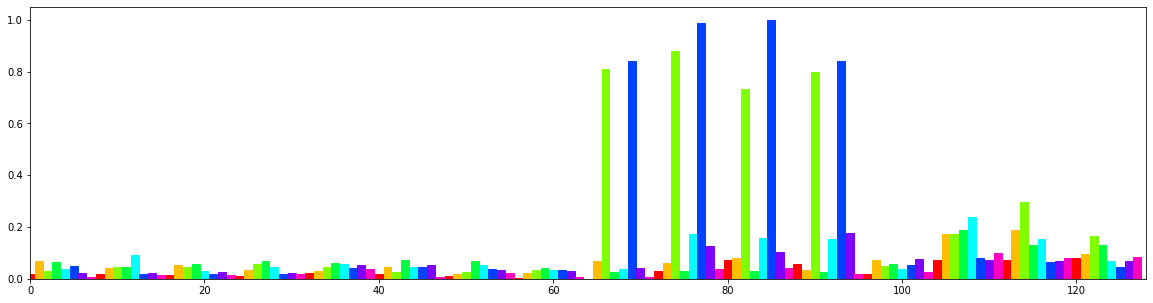

In [16]:
# Laenge des finalen Deskriptors
desc_len = 4*4*8

#raise NotImplementedError()

desc = np.zeros(desc_size)


# Berechnung des finalen Deskriptors durch Konkatenation der Zellenhistogramme
desc=orientation_histograms.reshape(-1)
#raise NotImplementedError()

plt.figure(figsize=(20,5))
plt.xlim((0,desc_len))
x_pos = np.arange(len(desc))
barlist = plt.bar(x_pos, desc, width=0.9, align='center', alpha=1)
for label, bar in enumerate(barlist):
    color = color_map[label % 8]
    bar.set_color(color)


Visuelle Ähnlichkeit zwischen Bildbereichen lässt sich mit Hilfe von Bilddeskriptoren durch einfache Vektordistanzen beschreiben. Um dies zu verdeutlichen, soll das Beispielbild in einzelne Patches unterteilt werden, welche durch einen zu berechnenden Deskriptor repräsentiert werden. Nutzen Sie ihre vorherigen Implementierungen, um die Funktionen `compute_image_gradients` und `compute_descriptor` im Modul `descriptor.py` zu implementieren. Die Funktion `plot_and_extract_patches` gibt eine Liste zurück, welche Patches enthält die durch folgendes Tupel definiert sind (`(x, y)`, `patch_magnitudes`, `patch_orientations`). Berechnen sie anschließend für ein Anfragepatch (Query) die fünf ähnlichsten Nachbarn. Dazu steht ihnen die Funktion `cdist` zur Verfügung welche die Vektordistanzen zwischen Matrizen berechnet. Die Variable `neighbours` soll anschließend die IDs des Anfragepatches, sowie der fünf ähnlichsten Bildbereiche enthalten.

45
(45, 128)


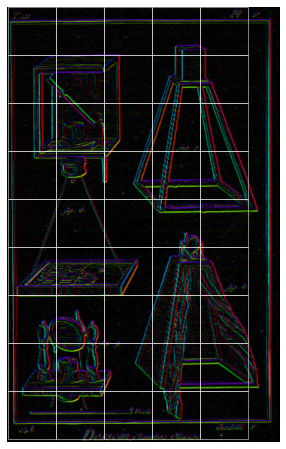

In [17]:
from scipy.spatial.distance import cdist
from common.visualization import plot_and_extract_patches
from common.descriptor import compute_image_gradient, compute_descriptor

magnitudes, orientations, quantized_orientations = compute_image_gradient(img)

patches = plot_and_extract_patches(gradient_directions_magnitudes_rgb, quantized_orientations, magnitudes, desc_size)

print( len(patches)) 

desc_list = []

for (x, y), patch_magnitudes, patch_orientations in patches:
    desc_list.append(compute_descriptor(patch_orientations, patch_magnitudes, cells))
desc_mat = np.vstack(desc_list)

print(desc_mat.shape)


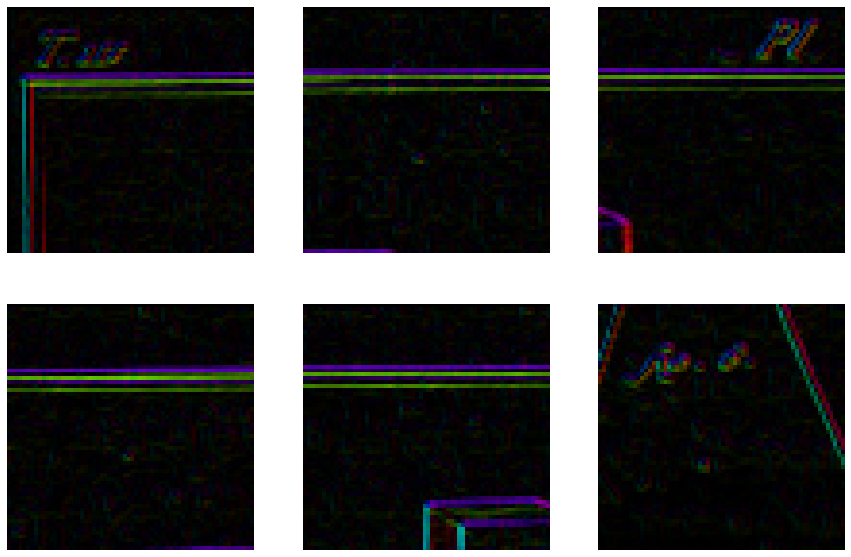

In [18]:
#take the second patch 
query = desc_mat[ :  , : ]

neighbours = np.zeros(6, dtype=int)

distances = cdist(query, desc_mat)

sort_dist = np.argsort(distances)

neighbours = sort_dist[0,0:6]



plt.figure(figsize=(15,10))
for i, n in enumerate(neighbours):
    plt.subplot(2,3,i+1)
    plt.axis('off')
    patch_img = gradient_directions_magnitudes_rgb[patches[n][0][1]:patches[n][0][1]+desc_size,
                                                   patches[n][0][0]:patches[n][0][0]+desc_size,
                                                   :]
    plt.imshow(patch_img)